My dataset of choice is ERA5 monthly averaged data on single levels from 1979 to present, which is the fifth 
generation ECMWF renalysis for the global climate and weather for the past 4 to 7 decades. I plan to look at 
the variables of total cloud cover, total precipitation, column cloud liquid water, as well as total column cloud water vapor in Africa to answer the question: Has mean precipitable water changed significantly in the African monsoon region over the last 70 years? 
In which season? And how is that change related to changes in clouds?

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


Text(0.5, 1.0, 'Average Total Cloud Cover for Africa in Janurary 1979')

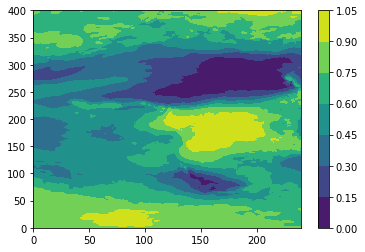

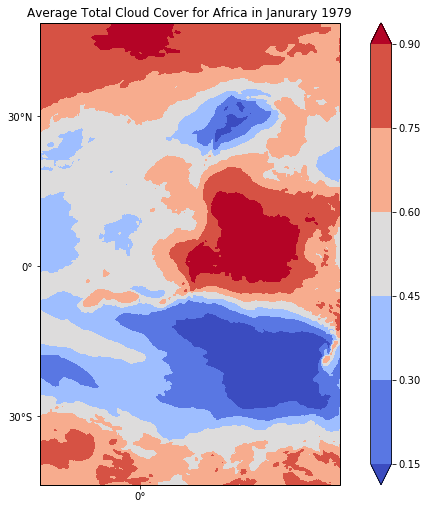

In [5]:
#Import all necessary packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE

f= 'ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
#print(DS1)
data_lat= DS1.latitude.values #latitude array
data_lon= DS1.longitude.values #longitude array
nlats = len(data_lat[:]) #length of latitude array
nlons = len(data_lon[:]) #length of longitude array
time = DS1.time #time array
total_cloud_cover = DS1.tcc #total cloud cover
total_precip= DS1.tp #total precipitation
column_cloud_lw = DS1.tclw #total column cloud liquid water
column_cloud_wv = DS1.tcwv #total column cloud water vapor
# Part A: Make a contour plot of the first time

ds_mean = DS1.mean(axis=(1)) # average over the expver variable (axis 1) to get rid of it for now and get a 3D array of time,lat,lon
total_cloud_cover = ds_mean.tcc #total cloud cover
total_precip= ds_mean.tp #total precipitation
column_cloud_lw = ds_mean.tclw #total column cloud liquid water


plt.contourf(ds_mean['tcc'][0,-1::-1,:]) #creates a contour plot of the first time of the total cloud cover variable
plt.colorbar()

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tcc'][0,-1::-1,:]
data, lons = add_cyclic_point(data, coord=data_lon)

# Make a filled contour plot
cs=ax.contourf(lons, data_lat, data,
            transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both')

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-20, 40, -40, 45]) #sets the extent for the plot bounds; since the data file I'm using does not cover the entire Globe,but rather just Africa
cbar = plt.colorbar(cs)
ax.set_title('Average Total Cloud Cover for Africa in Janurary 1979')